<a href="https://colab.research.google.com/github/zoechallacombe/FinalProjects-Sp19/blob/master/RiseandDeclineOHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cogs 108 - Final Project
## Team ZOISH (aka Group 91)

# Overview

In this day and age, art and culture is consumed at a fast rate. Our group is interested in music virality, namely “One Hit Wonders”. What makes a hit single and how do artists try to maintain their popularity? What trends do they have in common? We looked at datasets that reflect the top music during a time period (namely Spotify) and looked for trends that One Hit Wonders follow to come to a conclusion on factors of similarities. 


# Names + IDs



*   Zoe Challacombe (A1490527)
     * Data collection and cleaning
*   Ori Hazan (A13909631)
     * Writing, Discussion & Conclusion
*   Ilmaa Haque (A14438483)
     * Writing and Analysis
*   Shivani Doshi (A13821970)
     * Data analysis and plotting
*   Hien Phan (A12986056)
     * Data & Stat Analysis, Dicsussion & Conclusion




# Research Question


What differentiates a One Hit Wonder song from a reoccuring arist that is consistenly on the top charts? Do audio features, like *dancability and tempo*, play a role? What about the length of the song?






# Background and Prior Work

Music is a universal art form that supports rich histories and cultures, brings people together, and provides joy. As music becomes a more accepting and diverse industry, a more experimental type of music is accepted, and songs that stray from the norm find their way to the top. 

A similar project is [016-Final Project](https://github.com/COGS108/FinalProjects-Wi18/blob/master/016-FinalProject.ipynb) which is on how the composition (like beats per minute, danceability, and speechiness) of a song lands it on the top of the charts (namely for music applications like Spotify). The dataset this group used was a Spotify chart of songs with the most streams from 2014 to the present minus one day. They found that the top songs had high danceability rates, energy, and accousticness. 

Our project will incorporate similar aspects, but mainly compare the features of the songs that are "One Hit Wonders" to "Multiple Hits" throughout the decades, as well as compared to 2018. We were interested in learning about this phenomenon of how previously unheard of or unpopular artists make their way to the top of the charts and into the soundtrack of the lives of the general public. We are hoping to find trends between these two groups that will help us come to a conclusion about what differentiates a One Hit Wonder song (acronymed as OHW).

# Hypothesis

Our hypotheses are that one hit wonders fade away because a new song comes out and replaces it with a “fresh” song. One Hit Wonders can be overplayed, and people can grow tired of them. Our group hypothesized that beats per minute has something to do with the rise and gain in popularity of a song; the more beats per minute in a song, the more popularity it gains. We were also interested in seasons, and predicted that a majority of OHW came out during the summer time due to the relaxing and enjoyable nature of summer (June - September). These songs, we predicted, also would have a higher dancebility rate. 

# Dataset(s)


[Top Spotify Tracks](https://docs.google.com/spreadsheets/d/1VPfzo9_EVpaeOhEEAB3-moUMcaWBD0YCXa-wBI6s6d4/edit?fbclid=IwAR2DVAKNEMBUHT8P5183gF2Zz3v2MJn7SOpoeERizGNxbbkiFFvpbXU9KU8#gid=1504947022): This dataset has the top 100 songs on Spotify. Aside from the artist and song title, the dataset also includes auditory categories for the song (like “tempo”). This dataset is more refined and will help us compare broad findings to more detailed findings.  We took this data set and combined it with the same top 100s of every year going back all the way to 1954 giving us roughly 15,000 observations. In doing this, we had to create our own spreadsheet with all of the observations. We obtained this data set using the Spotipy API, and example would be the [2018 Top 100 Spotify Tracks](https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018).

[Spotipy](https://spotipy.readthedocs.io/en/latest/): Using *Spotipy*, Spotify's python API, we will be able to uncover the differences between an artist’s “one hit wonder” song and the artitsts with multiple hits using spotify’s analytics to help determine what makes a song a one hit wonder.

We plan on going through each dataset separately and removing observations that we don't need before combining them so that we can isolate relevant observations that are related to each other. 





# Setup 

In [0]:
#import important stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import scipy.stats as stats
from scipy.stats import ttest_ind
from statistics import mean

In [0]:

#get raw data from github
spotify = 'https://bit.ly/2HvsJJT'

#read csv
df_spotify = pd.read_csv(spotify)

#read dataframe onto notebook
pd.DataFrame(df_spotify)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,song,artist,WeekID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zoom,Lil' Boosie,2006-12-23
1,000u1dTg7y1XCDXi80hbBX,0.763,0.440,7.0,-13.110,1.0,0.0388,0.181000,0.000457,0.1140,0.4210,120.492,audio_features,300440.0,4.0,I Don't Want A Lover,Texas,1989-09-16
2,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.3180,127.947,audio_features,233267.0,4.0,"Swing, Swing",The All-American Rejects,2003-08-30
3,004ZH9ISUSEwansKKbUdJs,0.348,0.924,7.0,-3.048,1.0,0.0945,0.236000,0.000000,0.1020,0.0869,114.117,audio_features,291800.0,4.0,You Better Wait,Steve Perry,1994-07-23
4,005lwxGU1tms6HGELIcUv9,0.699,0.760,5.0,-3.173,1.0,0.0677,0.002230,0.000000,0.1320,0.6960,129.996,audio_features,179640.0,4.0,I Kissed A Girl,Katy Perry,2008-05-31
5,006Ndmw2hHxvnLbJsBFnPx,0.518,0.060,10.0,-14.887,1.0,0.0441,0.987000,0.000008,0.1610,0.3360,127.870,audio_features,216373.0,4.0,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1958-08-09
6,007n10xGvSbc7dKgAORVIq,0.668,0.650,10.0,-4.351,1.0,0.0228,0.142000,0.000325,0.0956,0.5770,103.954,audio_features,231347.0,4.0,Brokenheartsville,Joe Nichols,2003-05-10
7,00B7TZ0Xawar6NZ00JFomN,0.620,0.625,9.0,-7.438,1.0,0.5530,0.287000,0.000000,0.3140,0.6650,167.911,audio_features,284856.0,4.0,Best Life,Cardi B,2018-04-28
8,00CmjeeHvAVKvx3tcIiZTy,0.679,0.412,2.0,-16.962,1.0,0.0305,0.416000,0.000000,0.1280,0.9630,105.903,audio_features,166733.0,4.0,Two Lovers,Mary Wells,1962-12-08
9,00FRRwuaJP9KimukvLQCOz,0.583,0.798,2.0,-9.716,0.0,0.0612,0.113000,0.000000,0.0513,0.9600,85.323,audio_features,280280.0,4.0,"Never, Never Gonna Give Ya Up",Barry White,1973-11-03


# Data Cleaning

In [0]:
#drop unnecessary columns
df_spotify = df_spotify.drop(df_spotify.columns[0], axis=1)
df_spotify = df_spotify.drop(columns=["type"])
#drop null values
df_spotify =df_spotify.dropna()
#read data onto notebook
pd.DataFrame(df_spotify)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song,artist,WeekID
1,0.763,0.440,7.0,-13.110,1.0,0.0388,0.181000,0.000457,0.1140,0.4210,120.492,300440.0,4.0,I Don't Want A Lover,Texas,1989-09-16
2,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.3180,127.947,233267.0,4.0,"Swing, Swing",The All-American Rejects,2003-08-30
3,0.348,0.924,7.0,-3.048,1.0,0.0945,0.236000,0.000000,0.1020,0.0869,114.117,291800.0,4.0,You Better Wait,Steve Perry,1994-07-23
4,0.699,0.760,5.0,-3.173,1.0,0.0677,0.002230,0.000000,0.1320,0.6960,129.996,179640.0,4.0,I Kissed A Girl,Katy Perry,2008-05-31
5,0.518,0.060,10.0,-14.887,1.0,0.0441,0.987000,0.000008,0.1610,0.3360,127.870,216373.0,4.0,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1958-08-09
6,0.668,0.650,10.0,-4.351,1.0,0.0228,0.142000,0.000325,0.0956,0.5770,103.954,231347.0,4.0,Brokenheartsville,Joe Nichols,2003-05-10
7,0.620,0.625,9.0,-7.438,1.0,0.5530,0.287000,0.000000,0.3140,0.6650,167.911,284856.0,4.0,Best Life,Cardi B,2018-04-28
8,0.679,0.412,2.0,-16.962,1.0,0.0305,0.416000,0.000000,0.1280,0.9630,105.903,166733.0,4.0,Two Lovers,Mary Wells,1962-12-08
9,0.583,0.798,2.0,-9.716,0.0,0.0612,0.113000,0.000000,0.0513,0.9600,85.323,280280.0,4.0,"Never, Never Gonna Give Ya Up",Barry White,1973-11-03
10,0.440,0.655,4.0,-8.424,1.0,0.4320,0.627000,0.000000,0.6070,0.8990,205.187,196347.0,4.0,Junk Food Junkie,Larry Groce,1976-01-17


In [0]:
#drop all artist duplicates to determine the one hit wonders
one_hit = df_spotify.drop_duplicates(subset=["artist"], keep=False)
df_one_hit = pd.DataFrame(one_hit)
df_one_hit

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song,artist,WeekID
1,0.763,0.440,7.0,-13.110,1.0,0.0388,0.181000,0.000457,0.1140,0.421,120.492,300440.0,4.0,I Don't Want A Lover,Texas,1989-09-16
5,0.518,0.060,10.0,-14.887,1.0,0.0441,0.987000,0.000008,0.1610,0.336,127.870,216373.0,4.0,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1958-08-09
10,0.440,0.655,4.0,-8.424,1.0,0.4320,0.627000,0.000000,0.6070,0.899,205.187,196347.0,4.0,Junk Food Junkie,Larry Groce,1976-01-17
15,0.554,0.899,8.0,-4.573,1.0,0.4080,0.052100,0.000000,0.0568,0.552,171.966,227893.0,4.0,We Own It (Fast & Furious),2 Chainz & Wiz Khalifa,2013-06-15
16,0.850,0.687,0.0,-5.995,0.0,0.3080,0.213000,0.000000,0.0724,0.502,149.989,207013.0,4.0,Lookin Boy,Hot Stylz,2008-06-28
28,0.539,0.930,11.0,-6.035,1.0,0.0624,0.013800,0.000000,0.0673,0.584,127.454,218440.0,4.0,What I Didn't Know,Athenaeum,1998-08-08
30,0.483,0.460,5.0,-10.055,1.0,0.0282,0.658000,0.924000,0.1470,0.564,94.185,116733.0,4.0,The Stripper,David Rose and His Orchestra,1962-05-19
49,0.718,0.588,0.0,-11.360,1.0,0.0532,0.050700,0.000000,0.5890,0.650,109.103,160732.0,4.0,Dreams Are Ten A Penny,The First Class,1974-11-30
58,0.452,0.794,0.0,-5.151,1.0,0.0483,0.011100,0.001820,0.4160,0.282,137.825,196664.0,4.0,Harlem Shake,Baauer,2013-03-09
71,0.561,0.928,9.0,-5.216,1.0,0.1660,0.113000,0.000000,0.1730,0.882,154.914,169533.0,4.0,"Someday, Someway",Marshall Crenshaw,1982-08-28


In [0]:
#get shape of dataframe
df_one_hit.shape

(2728, 18)

In [0]:
#drop one hit wonders from the spotify datafram 
#to get people who have multiple hits
multiple_hits = pd.concat([df_spotify, one_hit, one_hit]).drop_duplicates(keep=False)
df_multiple_hits = pd.DataFrame(multiple_hits)
df_multiple_hits

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song,artist,WeekID
2,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.3180,127.947,233267.0,4.0,"Swing, Swing",The All-American Rejects,2003-08-30
3,0.348,0.924,7.0,-3.048,1.0,0.0945,0.236000,0.000000,0.1020,0.0869,114.117,291800.0,4.0,You Better Wait,Steve Perry,1994-07-23
4,0.699,0.760,5.0,-3.173,1.0,0.0677,0.002230,0.000000,0.1320,0.6960,129.996,179640.0,4.0,I Kissed A Girl,Katy Perry,2008-05-31
6,0.668,0.650,10.0,-4.351,1.0,0.0228,0.142000,0.000325,0.0956,0.5770,103.954,231347.0,4.0,Brokenheartsville,Joe Nichols,2003-05-10
7,0.620,0.625,9.0,-7.438,1.0,0.5530,0.287000,0.000000,0.3140,0.6650,167.911,284856.0,4.0,Best Life,Cardi B,2018-04-28
8,0.679,0.412,2.0,-16.962,1.0,0.0305,0.416000,0.000000,0.1280,0.9630,105.903,166733.0,4.0,Two Lovers,Mary Wells,1962-12-08
9,0.583,0.798,2.0,-9.716,0.0,0.0612,0.113000,0.000000,0.0513,0.9600,85.323,280280.0,4.0,"Never, Never Gonna Give Ya Up",Barry White,1973-11-03
11,0.620,0.703,2.0,-7.854,1.0,0.0836,0.479000,0.000000,0.1400,0.5590,136.155,239693.0,4.0,The Boy In The Bubble,Paul Simon,1987-03-21
12,0.487,0.900,0.0,-4.417,1.0,0.0482,0.000068,0.000000,0.3580,0.4840,149.937,204000.0,4.0,Sk8er Boi,Avril Lavigne,2002-12-28
13,0.894,0.568,2.0,-13.207,1.0,0.0952,0.332000,0.028100,0.0666,0.7420,106.025,147000.0,4.0,Get The Funk Out Ma Face,The Brothers Johnson,1976-08-21


# Data Analysis & Results

Our group and Wikipedia defined a "One Hit Wonder" as a song that reached the Top 20 charts, but the artist never topped the charts again. This was a way to scrape out all of the songs by artists who were consistently charting, and find songs that were unique and truly a OHW. 

In the analysis, we want to get key features of songs relative to the decade and month that the song made the top 100. In order to do this, we created a function to extract the month and year that the song made the top 100. 

In [0]:
# function to grab the month of each song
def extract_month(week):
  return week[(week.find('-')+1):(week.find('-')+3)]

# function to grab the year of each song
def extract_year(week):
  return week[0:4]

# function to grab all values of a particular feature for the one hit wonders
# for each month and place them in a dictionary object
def one_hit_features_month(feature):
  toReturn = {}
  for i,row in df_one_hit.iterrows():
    if row['month'] in toReturn:
      toReturn[row['month']].append(row[feature])
    else:
      toReturn[row['month']] = list()
      toReturn[row['month']].append(row[feature])
  return get_average(toReturn)

# function to grab all values of a particular feature for the mutliple hit 
# wonders for each month and place them in a dictionary object
def multiple_hit_features_month(feature):
  toReturn = {}
  for i,row in df_multiple_hits.iterrows():
    if row['month'] in toReturn:
      toReturn[row['month']].append(row[feature])
    else:
      toReturn[row['month']] = list()
      toReturn[row['month']].append(row[feature])
  return get_average(toReturn)

# function to grab all values of a particular feature for the one hit wonders
# for each decade starting at 1950 and place them in a dictionary object
def one_hit_features_year(feature):
  toReturn = dict()
  toReturn[1950] = list()
  toReturn[1960] = list()
  toReturn[1970] = list()
  toReturn[1980] = list()
  toReturn[1990] = list()
  toReturn[2000] = list()
  toReturn[2010] = list()
  for i,row in df_one_hit.iterrows():
    year = int(row['year'])
    if year < 1960:
      toReturn[1950].append(row[feature])
    elif year >= 1960 and year < 1970:
      toReturn[1960].append(row[feature])
    elif year >= 1970 and year < 1980:
      toReturn[1970].append(row[feature])
    elif year >= 1980 and year < 1990:
      toReturn[1980].append(row[feature])
    elif year >= 1990 and year < 2000:
      toReturn[1990].append(row[feature])
    elif year >= 2000 and year < 2010:
      toReturn[2000].append(row[feature])
    else:
      toReturn[2010].append(row[feature])
  return get_average(toReturn)

# function to grab all values of a particular feature for the multiple hit 
# wonders for each decade starting at 1950 and place them in a dictionary object
def multiple_hit_features_year(feature):
  toReturn = dict()
  toReturn[1950] = list()
  toReturn[1960] = list()
  toReturn[1970] = list()
  toReturn[1980] = list()
  toReturn[1990] = list()
  toReturn[2000] = list()
  toReturn[2010] = list()
  for i,row in df_multiple_hits.iterrows():
    year = int(row['year'])
    if year < 1960:
      toReturn[1950].append(row[feature])
    elif year >= 1960 and year < 1970:
      toReturn[1960].append(row[feature])
    elif year >= 1970 and year < 1980:
      toReturn[1970].append(row[feature])
    elif year >= 1980 and year < 1990:
      toReturn[1980].append(row[feature])
    elif year >= 1990 and year < 2000:
      toReturn[1990].append(row[feature])
    elif year >= 2000 and year < 2010:
      toReturn[2000].append(row[feature])
    else:
      toReturn[2010].append(row[feature])
  return get_average(toReturn)

# function to get the average of the list of elements of the dict
def get_average(dt):
  for elem in dt:
    dt[elem] = mean(dt[elem])
  return dict(sorted(dt.items()))

# function to plot bar plot for month
def plotting_func_month(dict1, dict2, label, title):
  n_groups = 12
  fig,ax = plt.subplots()
  index = np.arange(n_groups)
  bar_width = 0.35
  opacity = 0.8

  rects1 = plt.bar(index, dict1, bar_width, alpha=opacity, 
                   color='g', label='One hits')
  rects2 = plt.bar(index+bar_width, dict2, bar_width, alpha=opacity, 
                   color='b', label='Multiple hits')

  plt.xlabel('Month')
  plt.ylabel(label)
  plt.title(title)
  plt.xticks(index+bar_width, 
             ('01','02','03','04','05','06','07','08','09','10','11','12'))
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.tight_layout()
  plt.show()
  
# function to plot bar plot for year
def plotting_func_year(dict1, dict2, label, title):
  n_groups = 7
  fig, ax = plt.subplots()
  index = np.arange(n_groups)
  bar_width = 0.40
  opacity = 0.8
  
  rects1 = plt.bar(index, dict1, bar_width, alpha=opacity, 
                   color='g', label='One hits')
  rects2 = plt.bar(index+bar_width, dict2, bar_width, alpha=opacity, 
                   color='b', label='Multiple hits')
  
  plt.xlabel('Year')
  plt.ylabel(label)
  plt.title(title)
  plt.xticks(index+bar_width, ('1950-59','1960-69','1970-79','1980-89',
                               '1990-99','2000-09','2010-18'))
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.40))
  plt.show()

In [0]:
# setting the month column values
df_one_hit['month'] = np.nan
df_one_hit['year'] = np.nan
df_multiple_hits['month'] = np.nan
df_multiple_hits['year'] = np.nan

for i,row in df_one_hit.iterrows():
  week = df_one_hit.loc[i,'WeekID']
  df_one_hit.loc[i,'month'] = extract_month(week)
  df_one_hit.loc[i,'year'] = extract_year(week)

for i,row in df_multiple_hits.iterrows():
  week = df_multiple_hits.loc[i,'WeekID']
  df_multiple_hits.loc[i,'month'] = extract_month(week)
  df_multiple_hits.loc[i,'year'] = extract_year(week)

In all of our plot sections, we wanted to record values through month and through years. The first plot has the X axis as the month as a number (where 01 is January and 12 is December), and the Y axis is the audio feature of the song (like tempo) that we are looking at. The second plot looks at the same feature of the song, but throughout the decades. We compare the one hit wonder data (in green) to the songs by artists who are normally on the charts (multiple hits) in blue. We also created an **if statement** that would do the T-Test to gather if there was some statistical significance in the scores. To define what the audio features and their values meant, we used the [Spotify Audio Features](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) page. 

### Danceability

The first feature that we want to look at is the danceability of the song. The danceability of the song represents how suitable the song is for dancing. Spotify describes it as the combination of other features such as tempo, rhythm, stabilty, beat strength, and overall regularity. A 0.0 is a low danceability rate, while a 1.0 is the highest. 

We notice that, on average, one hit wonders have slightly more danceability in both per month and per decade. Only in the yearly values (not decades) is there a statistical significance. Furthermore,  there seems to be an upwards trend of danceability throughout the decades, but there is no statistical significance between OHW and multiple hits. 

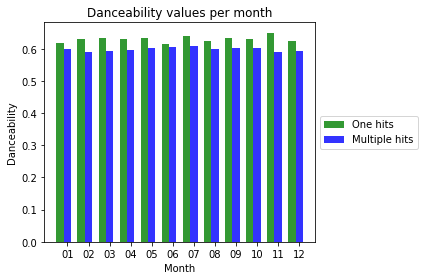

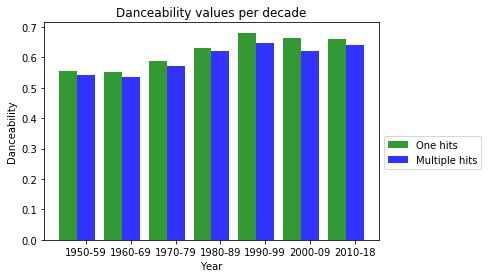

In [0]:
# danceability PER MONTH
danceabilityOHM = one_hit_features_month('danceability')
danceabilityMHM = multiple_hit_features_month('danceability')

plotting_func_month(danceabilityOHM.values(), danceabilityMHM.values(), 
                    'Danceability', 'Danceability values per month')

# danceability PER DECADE
danceabilityOHY = one_hit_features_year('danceability')
danceabilityMHY = multiple_hit_features_year('danceability')

plotting_func_year(danceabilityOHY.values(), danceabilityMHY.values(), 
                   'Danceability', 'Danceability values per decade')

In [0]:
#convert dictionary to array so we can use in ttest
month_one_hit_dance = list(danceabilityOHM.values())
month_multi_hit_dance = list(danceabilityMHM.values())

#perform ttest
t_val,p_val = stats.ttest_ind(month_one_hit_dance,month_multi_hit_dance)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

T value is  10.17853364501621
P value is  8.739924474678036e-10
There is a significant difference!


In [0]:
#convert dictionary to array so we can use in ttest
year_one_hit_dance = list(danceabilityOHY.values())
year_multi_hit_dance = list(danceabilityMHY.values())

#perform ttest
t_val,p_val = stats.ttest_ind(year_one_hit_dance,year_multi_hit_dance)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

0.8086341777304219 0.4344650120303821
There is NOT a significant difference!


### Valence


The next feature that we want to look at is the valence of the song. The valence is a measure of internal goodness, or how happy the song makes you feel. Spotify describes it as "musical positiveness". A 0.0 is a low danceability rate, while a 1.0 is the highest.

It seems as if valence values in one hit wonders are higher in the beginning of the year (namely January, February, and April), slow down for the middle of the year, peak in October, and then slowly decline for the rest of the year. Based on the T-Test, there is not a statistically significant effect, but the graphs show a decline in valence throughout the decades in both, one hit wonders and multiple hits. One hits seem to have a bigger valence value compared to multiple hits, until 2010 and onward. 



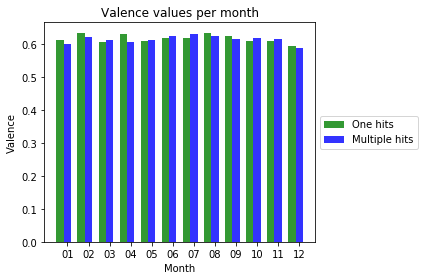

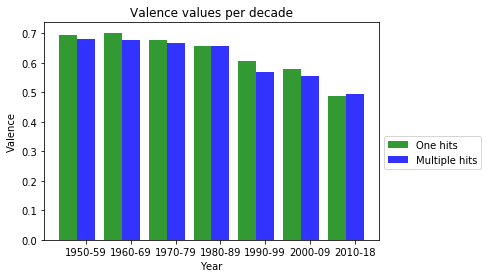

In [0]:
# valence PER MONTH
valenceOHM = one_hit_features_month('valence')
valenceMHM = multiple_hit_features_month('valence')

plotting_func_month(valenceOHM.values(), valenceMHM.values(), 
                    'Valence', 'Valence values per month')

# valence PER DECADE
valenceOHY = one_hit_features_year('valence')
valenceMHY = multiple_hit_features_year('valence')

plotting_func_year(valenceOHY.values(), valenceMHY.values(), 
                   'Valence', 'Valence values per decade')

In [0]:
#convert dictionary to array so we can use in ttest
month_one_hit_valence = list(valenceOHM.values())
month_multi_hit_valence = list(valenceMHM.values())

#perform ttest
t_val,p_val = stats.ttest_ind(month_one_hit_valence,month_multi_hit_valence)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

0.5056765012647755 0.6181129829256431
There is NOT a significant difference!


In [0]:
#convert dictionary to array so we can use in ttest
year_one_hit_valence = list(valenceOHY.values())
year_multi_hit_valence = list(valenceMHY.values())

#perform ttest
t_val,p_val = stats.ttest_ind(year_one_hit_valence,year_multi_hit_valence)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

0.3703698055748461 0.7175617214373
There is NOT a significant difference!


### Tempo

Tempo is based off of the beats per minute (or *bpm*). The higher the number, the faster paced the song is. 

We notice that the average tempo of tracks hovers around 115-120 bpm and stays around those values consistently throughout the month and decades. Differing tempos usually implies different genres/production. Pop music tends to be in the 90-100 bpm range, while house music is higher (around 125). There were no statistically significant differences found between the two groups. This just shows that listeners have always liked songs with the same range of beats per minute. 

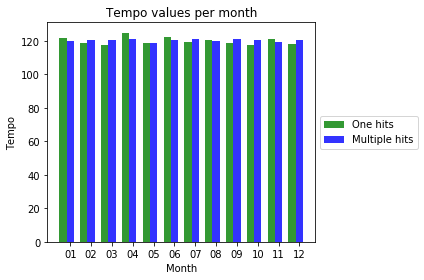

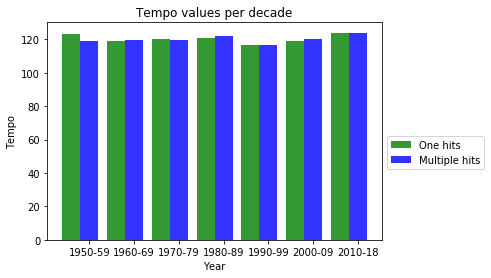

In [0]:
# tempo PER MONTH
tempoOHM = one_hit_features_month('tempo')
tempoMHM = multiple_hit_features_month('tempo')

plotting_func_month(tempoOHM.values(), tempoMHM.values(), 
                    'Tempo', 'Tempo values per month')

# tempo PER DECADE
tempoOHY = one_hit_features_year('tempo')
tempoMHY = multiple_hit_features_year('tempo')

plotting_func_year(tempoOHY.values(), tempoMHY.values(), 
                   'Tempo', 'Tempo values per decade')

In [0]:
#convert dictionary to array so we can use in ttest
month_one_hit_bpm = list(tempoOHM.values())
month_multi_hit_bpm = list(tempoMHM.values())

#perform ttest
t_val,p_val = stats.ttest_ind(month_one_hit_bpm,month_multi_hit_bpm)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

-0.5196296755589325 0.6085108571299931
There is NOT a significant difference!


In [0]:
#convert dictionary to array so we can use in ttest
year_one_hit_bpm = list(tempoOHY.values())
year_multi_hit_bpm = list(tempoMHY.values())

#perform ttest
t_val,p_val = stats.ttest_ind(year_one_hit_bpm,year_multi_hit_bpm)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

0.230257766506424 0.8217699845427475
There is NOT a significant difference!


### Liveness

Liveness is the measurement for how much audience or background noise there is in a song. Anything above a 0.8 displays a high liveness level. 

The results show that the liveness value of songs is usually under a 0.2. This makes sense, as most of the songs on the charts are highly produced and usually not live versions. Although the differences seem prominent in the graphs, there is no statistical significance between the two plots. 

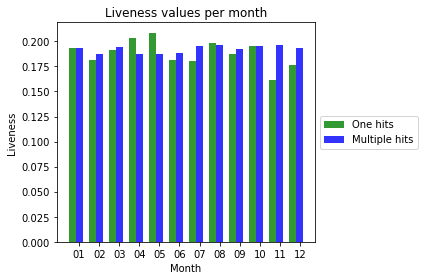

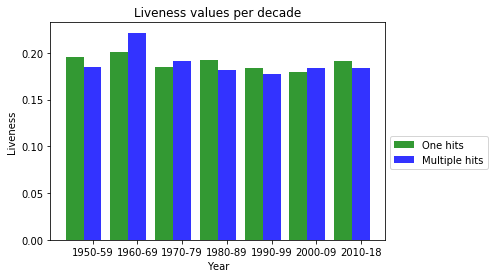

In [0]:
# liveness PER MONTH
livenessOHM = one_hit_features_month('liveness')
livenessMHM = multiple_hit_features_month('liveness')

plotting_func_month(livenessOHM.values(), livenessMHM.values(), 
                    'Liveness', 'Liveness values per month')

# liveness PER DECADE
livenessOHY = one_hit_features_year('liveness')
livenessMHY = multiple_hit_features_year('liveness')

plotting_func_year(livenessOHY.values(), livenessMHY.values(), 
                   'Liveness', 'Liveness values per decade')

In [0]:
#convert dictionary to array so we can use in ttest
month_one_hit_live = list(livenessOHM.values())
month_multi_hit_live = list(livenessMHM.values())

#perform ttest
t_val,p_val = stats.ttest_ind(month_one_hit_live,month_multi_hit_live)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

-0.9975974020662416 0.3293214127825085
There is NOT a significant difference!


In [0]:
#convert dictionary to array so we can use in ttest
year_one_hit_live = list(livenessOHY.values())
year_multi_hit_live = list(livenessMHY.values())

#perform ttest
t_val,p_val = stats.ttest_ind(year_one_hit_live,year_multi_hit_live)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

0.14274222762483427 0.88886251678749
There is NOT a significant difference!


### Loudness


Spotify describes loudness as the quality of sound that primarily correlates to the amplitude of the song. These values typically range from -60dB (being the lowest) to 0dB (being the highest).

Throughout the year, it seems that the loudness value of songs that come out usually stays consistent. However, we do notice that throughout there is a small jump from the 80s to the 90s and a bigger jump transitioning from the 90s to the 21st century. There is a statistical significance in loudness throughout the months. OHW seem to be higher/louder than multiple hits, especially in the months of February - May, and July - September. 

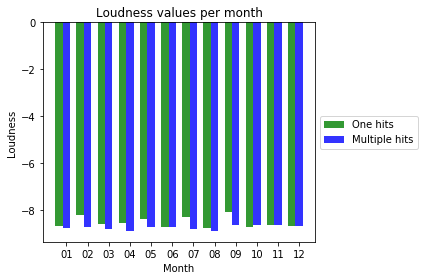

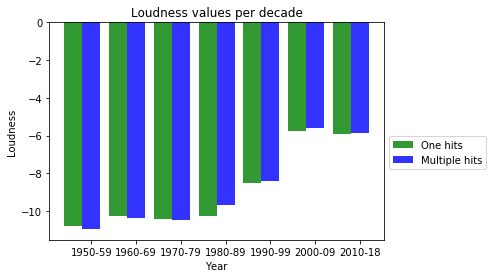

In [0]:
# loudness PER MONTH
loudnessOHM = one_hit_features_month('loudness')
loudnessMHM = multiple_hit_features_month('loudness')

plotting_func_month(loudnessOHM.values(), loudnessMHM.values(), 
                    'Loudness', 'Loudness values per month')

# loudness PER DECADE
loudnessOHY = one_hit_features_year('loudness')
loudnessMHY = multiple_hit_features_year('loudness')

plotting_func_year(loudnessOHY.values(), loudnessMHY.values(), 
                   'Loudness', 'Loudness values per decade')

In [0]:
#convert dictionary to array so we can use in ttest
month_one_hit_loudness = list(loudnessOHM.values())
month_multi_hit_loudness = list(loudnessMHM.values())

#perform ttest
t_val,p_val = stats.ttest_ind(month_one_hit_loudness,month_multi_hit_loudness)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

3.0937488668003934 0.0053020136418929515
There is a significant difference!


In [0]:
#convert dictionary to array so we can use in ttest
year_one_hit_loudness = list(loudnessOHY.values())
year_multi_hit_loudness = list(loudnessMHY.values())

#perform ttest
t_val,p_val = stats.ttest_ind(year_one_hit_loudness,year_multi_hit_loudness)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

-0.0693616158401369 0.9458442255554049
There is NOT a significant difference!


### Instrumentalness

Spotify describes the instrumentalness of a song the sounds of the music rather than the vocals. The higher the instrumentalness value, the greater chance that the song contains no vocal content. 

We found that the instrumentalness values of all one hits throughout the months are higher than multiple hits. Although there is no hollistic statistical significance throughout the decades, 1960-80 see the largest peak and then decline in instrumentalness in OHW compared to multiple hits. 

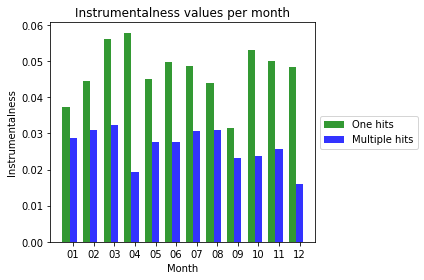

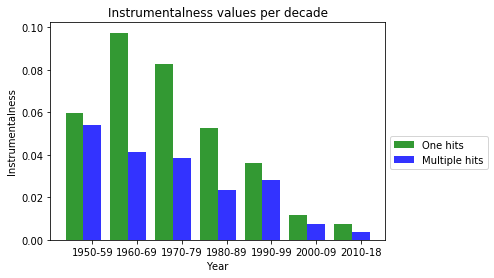

In [0]:
# instrumentalness PER MONTH
instrumentalnessOHM = one_hit_features_month('instrumentalness')
instrumentalnessMHM = multiple_hit_features_month('instrumentalness')

plotting_func_month(instrumentalnessOHM.values(), instrumentalnessMHM.values(), 
                    'Instrumentalness', 'Instrumentalness values per month')

# instrumentalness PER DECADE
instrumentalnessOHY = one_hit_features_year('instrumentalness')
instrumentalnessMHY = multiple_hit_features_year('instrumentalness')

plotting_func_year(instrumentalnessOHY.values(), instrumentalnessMHY.values(), 
                   'Instrumentalness', 'Instrumentalness values per decade')

In [0]:
#convert dictionary to array so we can use in ttest
month_one_hit_instrum = list(instrumentalnessOHM.values())
month_mult_hit_instrum = list(instrumentalnessMHM.values())

#perform ttest
t_val,p_val = stats.ttest_ind(month_one_hit_instrum, month_mult_hit_instrum)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

8.007663619416906 5.810143009078152e-08
There is a significant difference!


In [0]:
#We now want to do the same to the instrumentalness throughout each decade
year_one_hit_instrum = list(instrumentalnessOHY.values())
year_multi_hit_instrum = list(instrumentalnessMHY.values())

#perform ttest
t_val,p_val = stats.ttest_ind(year_one_hit_instrum, year_multi_hit_instrum)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

1.490742127922239 0.1618400713901249
There is NOT a significant difference!


### Key Values

Key values are described as the pitch of the song and each key is represented by numbers 0-10. Seeing the averages of the keys throughout both plots sitting around 5 indicates that there is a good representation of all keys hitting the top 100. 

No significant difference was found in either group. 

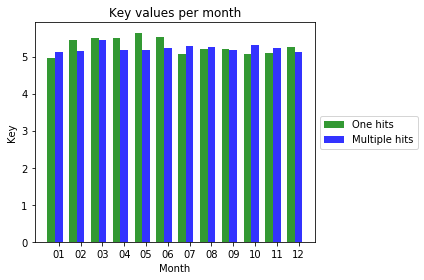

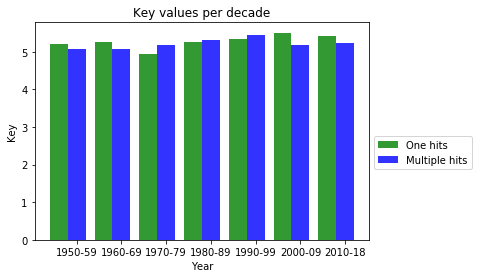

In [0]:
# key PER MONTH
keyOHM = one_hit_features_month('key')
keyMHM = multiple_hit_features_month('key')

plotting_func_month(keyOHM.values(), keyMHM.values(), 
                    'Key', 'Key values per month')

# instrumentalness PER DECADE
keyOHY = one_hit_features_year('key')
keyMHY = multiple_hit_features_year('key')

plotting_func_year(keyOHY.values(), keyMHY.values(), 
                   'Key', 'Key values per decade')

In [0]:
#convert dictionary to array so we can use in ttest
month_one_hit_key = list(keyOHM.values())
month_multi_hit_key = list(keyMHM.values())

#perform ttest
t_val,p_val = stats.ttest_ind(month_one_hit_key,month_multi_hit_key)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

0.9978815614169371 0.32918665930656543
There is NOT a significant difference!


In [0]:
#convert dictionary to array so we can use in ttest
year_one_hit_key = list(keyOHY.values())
year_multi_hit_key = list(keyMHY.values())

#perform ttest
t_val,p_val = stats.ttest_ind(year_one_hit_key,year_multi_hit_key)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

0.7704402220858 0.45593980742013174
There is NOT a significant difference!


### Duration

Duration is just the length of the song, and spotify measured it in milliseconds.There is not much significant difference between OHW and regular chart tracks in the month to month comparison versus the decade comparison. There does seem to be an upwards trend of the duration of songs throughout the years, but not enough to pass the T-Test. 

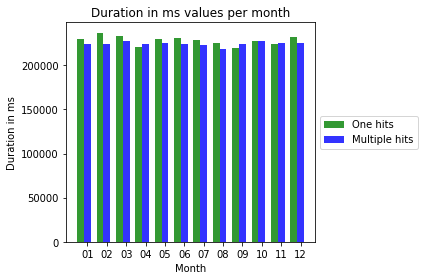

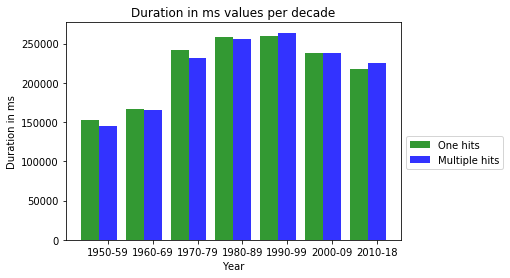

In [0]:
# duration_ms PER MONTH
duration_msOHM = one_hit_features_month('duration_ms')
duration_msMHM = multiple_hit_features_month('duration_ms')

plotting_func_month(duration_msOHM.values(), duration_msMHM.values(), 
                    'Duration in ms', 'Duration in ms values per month')

# instrumentalness PER DECADE
duration_msOHY = one_hit_features_year('duration_ms')
duration_msMHY = multiple_hit_features_year('duration_ms')

plotting_func_year(duration_msOHY.values(), duration_msMHY.values(), 
                   'Duration in ms', 'Duration in ms values per decade')

In [0]:
#convert dictionary to array so we can use in ttest
month_one_hit_duration = list(duration_msOHM.values())
month_multi_hit_duration = list(duration_msMHM.values())

#perform ttest
t_val,p_val = stats.ttest_ind(month_one_hit_duration,month_multi_hit_duration)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

T value is  2.403120851641827
P value is  0.025126837956196326
There is NOT a significant difference!


In [0]:
#convert dictionary to array so we can use in ttest
year_one_hit_duration = list(duration_msOHY.values())
year_multi_hit_duration = list(duration_msMHY.values())

#perform ttest
t_val,p_val = stats.ttest_ind(year_one_hit_duration,year_multi_hit_duration)

#test to see if p_val passes significance
if p_val < 0.01:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is a significant difference!')
else:
    print('T value is ',t_val)
    print('P value is ',p_val)
    print('There is NOT a significant difference!')

T value is  0.05307559191080929
P value is  0.9585450249121119
There is NOT a significant difference!


# Ethics & Privacy 

### Data Collection 
Most of the datasets we found are through Kaggle and other open data repositories. The data comes from Spotify which reflects musicical trends rather than personal information itself. Since the data is public, we did not have to gather private information. 

### Data Storage
Since we took a lot of the spotify data and merged them all, we had to create our own spreadsheet. The storage of this data is on a  google spreadsheet that is viewable to everyone and we also have the raw data uploaded to github.  All of the information on the spreadsheets and raw data are from Spotify's own datasets. 

### Analysis
We do not plan on revealing any personal information because there is none in any of our datasets during our presentation of the data. 

### Modeling
We are only focusing on the music trends  and audio features of the songs that everyone that is listening to so variables such as race, sex, or religion are not included in the data. From this, we hope that no discriminatory conclusions can be drawn. 

### Deployment
If there are any implications that arise from the data, we will not use that information and exclude those variables from our analysis. 

###Unintended Consequences 
The U.S. Copyright Law Section 107 defines fair use as anything relating to ["criticism, comment, news reporting, teaching, scholarship, and research"](https://www.copyright.gov/fair-use/more-info.html).  Since our project is for scholarship and research, it is protected under fair use. We are not looking at specific populations and their trends, just communities as a whole. To access the Spotify API, we registered our application with Spotify to assure Spotify we aren't stealing music or trying to hack them, but also to ensure that we are making authorized calls. 

# Conclusion & Discussion

**Limitations:**
Our team originally wanted to factor in "memeability", or internet popularity and Twitter trends in regards to one hit wonders, but we were unable to analyze data to do that. In addition to this, internet data from social media sites would be hard to retreive since most of them did not exist before the 21st century. 

Another limitation was that we wanted to be able to compare the spotify data with the Billboard Top 100 data, but the datasets were completely different and the only way we would be able to compare them was through artist and song name. During this time, we were only using one year of the Spotify Top 100. We decided to just drop the Billboard 100 and use all of the Spotify Top 100s from the 1950s to current day. 

When we then tried to graph our findings. We wanted to create histograms to show the distributions of one hit wonders through out the years, but through our coding it was difficult to do. We ended up using bar graphs which was efficient since we could then compare the one hit wonders to the regular hits on a single graph.  

**Discussion:** 
There are some potential improvements that we could address for next time if we ever decide to continue working on this project. If we were to expand this project we would look at Twitter trends and see if we could compare One Hit Wonders from a certain time period to how many times they were tweeted about. This would provide information regarding the social factors behind the popularity of a song; different events can take place that give rise to a chart-topping song that are beyond the factors that we analyzed.

Another potential improvement would be to maybe organize the songs by key and then compare the one hit wonders to songs within their own key. This way the comparisons are more specific and might present something we haven't found yet. We could implement his idea further, by creating another column with each song's respective genre and use that to compare songs withint their own genre. 

Finally, a last expansion of the project could be finding OHW that are extreme outliers, and comparing them to the averages of the one hit wonders and regular top trending tracks. What makes the already OHW a truly unique and outlier of a song?

**Conclusions:**
In conclusion, our hypothesis that different audio features play a role in the importance of one hit wonders compared to others are mostly insignificant. Our results show that the only features displaying significant differences were danceability, loudness, and instrumentalness. Even then, the significant differences in those features were only present in the month to month comparison. All of the comparisons throughout each decade failed to reject the null hypothesis that audio features DO NOT play a role in the popularity of a song. We did notice that even though the features had no significant differences between one hit wonders and multiple hits, there were certain trends within certain features throughout the decades. Additional research can potentially show how these trends affect the production of music. One trend our group found interesting was the instrumentalness result. Throughout the decades, all top songs (OHW and multiple hits) have decreased in instrumentalness exceptionally. Songs with more vocals, like rap and spoken word songs show lower instrumentalness values, and many songs these days have atleast a rap verse or feature. 